# 1. 데이터 불러오기

In [117]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 타이타닉 데이터셋 불러오기
titanic = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/raw/titanic.csv')

# 2. 데이터 탐색 (EDA)
## 1) 데이터 개요

In [118]:
titanic.columns # feature 목록 확인

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [119]:
titanic.head() # 상위 5개의 데이터 미리보기

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
titanic.info() # 데이터 타입과 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [121]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [122]:
titanic.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


# 3. 데이터 시각화 및 탐색적 분석
## 1) Categorical Feature 분석

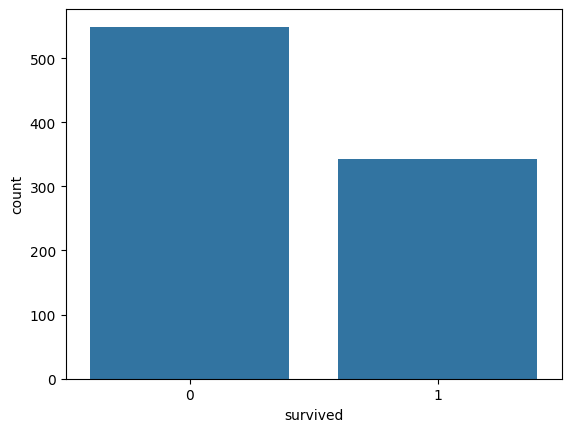

In [123]:
sns.countplot(data=titanic, x='survived')
plt.show()

## 2) Numerical Feature 분석

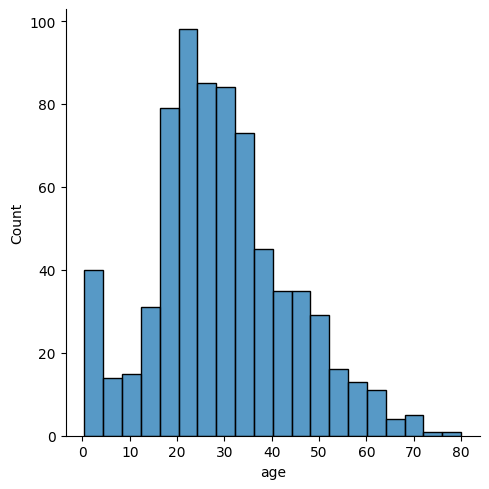

In [124]:
sns.displot(data=titanic, x='age')
plt.show()

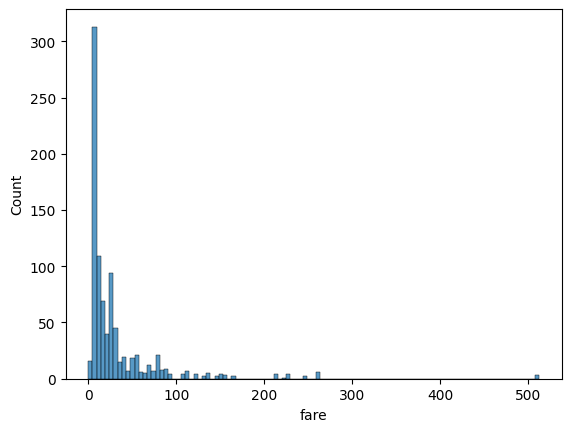

In [125]:
sns.histplot(data=titanic, x='fare')
plt.show()

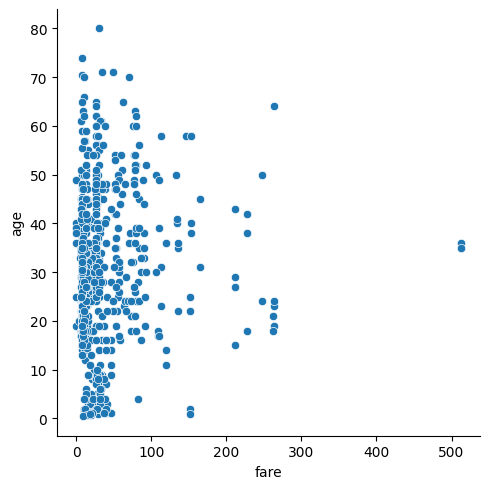

In [126]:
# 나이와 운임의 관계 시각화
sns.relplot(data=titanic, x='fare', y='age')
plt.show()

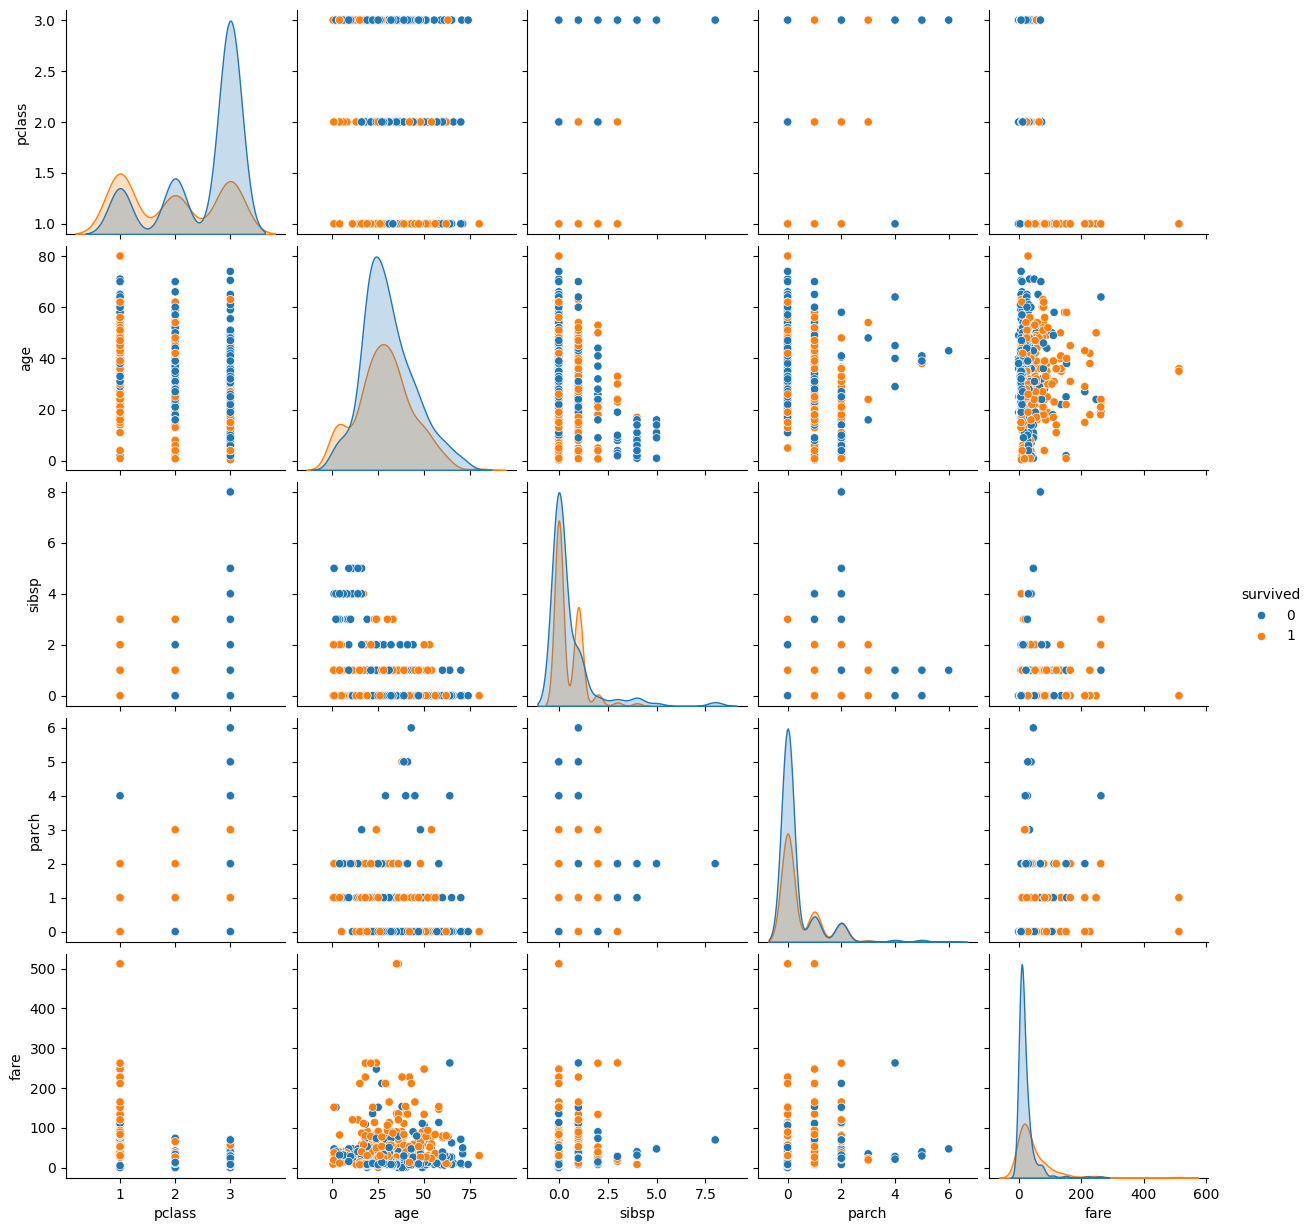

In [127]:
sns.pairplot(titanic, hue = 'survived')
plt.show()

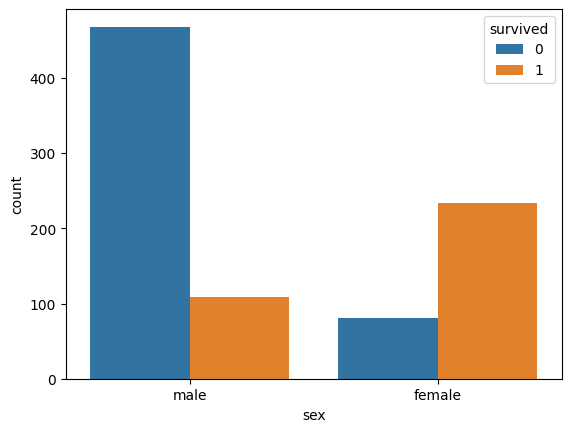

In [128]:
# 성별에 따른 생존율 확인
sns.countplot(data=titanic, x='sex', hue='survived')
plt.show()

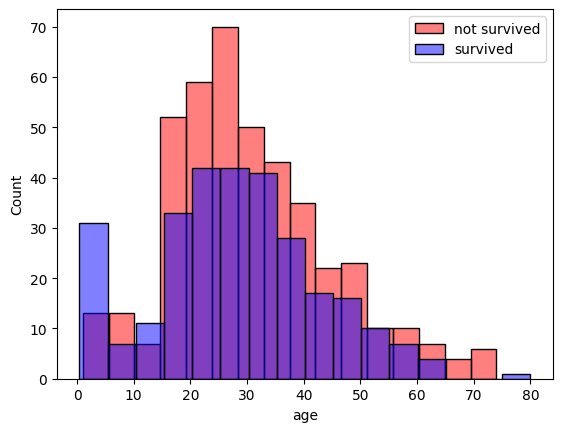

In [129]:
sns.histplot(titanic['age'].loc[titanic['survived']==0], 
            label = 'not survived', color = 'red', alpha = 0.5)

sns.histplot(titanic['age'].loc[titanic['survived']==1], 
            label = 'survived', color = 'blue', alpha = 0.5)

plt.legend()
plt.show()

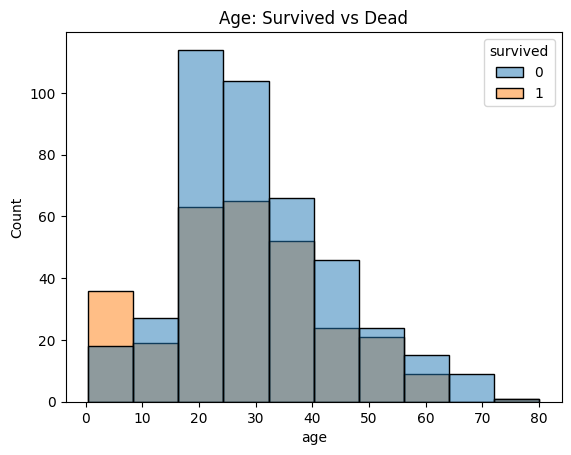

In [130]:
sns.histplot(x='age', hue='survived', data=titanic, bins=10)
plt.title('Age: Survived vs Dead')
plt.show()

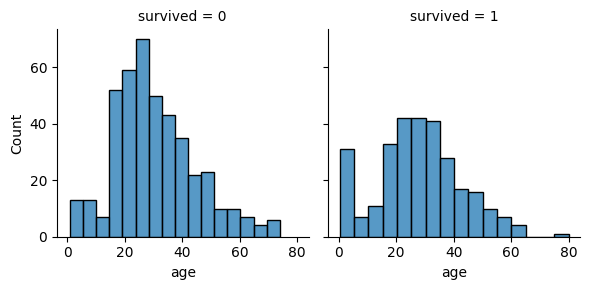

In [131]:
grid = sns.FacetGrid(titanic, col = 'survived')
grid.map(sns.histplot, 'age')
plt.show()

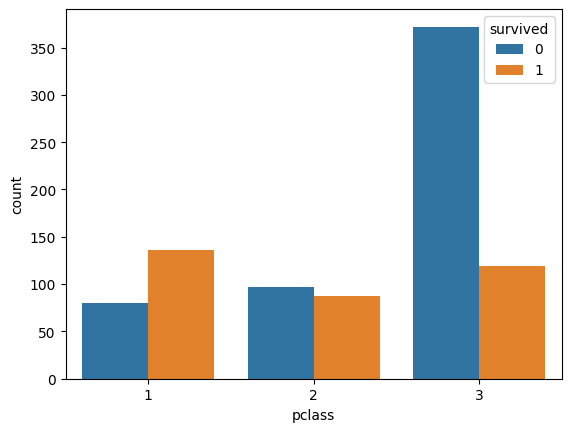

In [132]:
# 승객 등급과 생존율의 관계
sns.countplot(data=titanic, x='pclass', hue='survived')
plt.show()

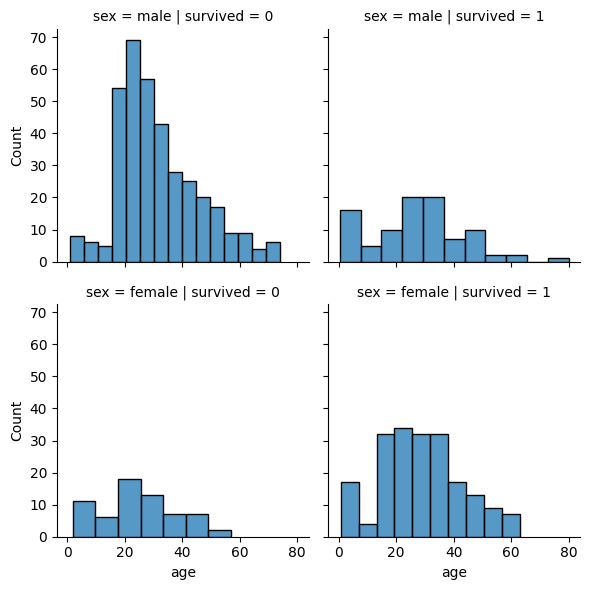

In [133]:
grid = sns.FacetGrid(titanic, row='sex', col='survived')
grid.map(sns.histplot, 'age')
plt.show()

C:\Users\mjink\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


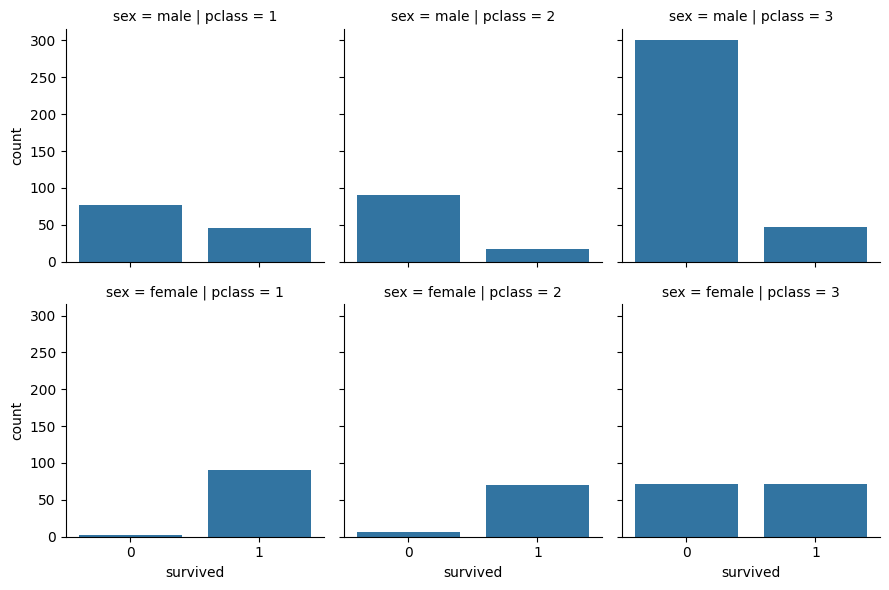

In [134]:
grid = sns.FacetGrid(data=titanic, row='sex', col='pclass')
grid.map(sns.countplot, 'survived')
plt.show()

# 4. 데이터 전처리
## 1) 결측치 처리 (Data Imputation)

In [135]:
titanic.isna().any()

survived    False
pclass      False
name        False
sex         False
age          True
sibsp       False
parch       False
ticket      False
fare        False
cabin        True
embarked     True
dtype: bool

In [136]:
titanic.isna().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [137]:
titanic.drop(columns = ['cabin','ticket'], axis=1, inplace=True)

In [138]:
# null값을 'S'로 대체 
titanic['embarked'].fillna('S', inplace =True)

C:\Users\mjink\AppData\Local\Temp\ipykernel_36048\448470144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna('S', inplace =True)


In [139]:
import numpy as np

age_mean = titanic.age.mean()
age_std = titanic.age.std()   
age_size = titanic.age.isna().sum() 

In [140]:
print(age_mean, age_std, age_size)

29.69911764705882 14.526497332334042 177


In [ ]:
np.random.seed(123)
rand_age = abs(np.random.randn(age_size)* age_std + age_mean)
print(rand_age)

In [142]:
# 기존 'age'열 중 비어있는 값(True)에 rand_age에 들어있는 값을 차례로 넣기
titanic['age'][titanic['age'].isna()] = rand_age

titanic.age.isna().any()

C:\Users\mjink\AppData\Local\Temp\ipykernel_36048\1575026512.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic['age'][titanic['age'].isna()] = rand_age
C:\Users\mjink\AppData\Local\Temp\ipykernel_36048\1575026512.py:2: SettingWithC

np.False_

## 2) pd.cut()

In [143]:
# ageband라는 새로운 열 생성 (5개의 구간으로 나누기)
titanic['age_band'] = pd.cut(titanic['age'], 5)

In [144]:
# 각 age_band 별 평균 survived가 어느 정도인지 보여주는 피벗 테이블
pd.pivot_table(titanic, values='survived', columns='age_band')

C:\Users\mjink\AppData\Local\Temp\ipykernel_36048\1451710533.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(titanic, values='survived', columns='age_band')


age_band,"(0.203, 16.226]","(16.226, 32.169]","(32.169, 48.113]","(48.113, 64.056]","(64.056, 80.0]"
survived,0.481203,0.356098,0.369919,0.438202,0.153846


In [145]:
# 'age' 열 제거
titanic.drop('age', axis=1, inplace=True)

## 3) Feature Engineering

In [147]:
# 'name'에서 title 추출
title_list = []
for name in titanic['name']:
    for item in name.split(' '):
        if '.' in item:
            title_list.append(item[:-1])
            break

In [148]:
# 'title' 열 추가            
titanic['title'] = pd.Series(title_list)

In [149]:
# 개체수가 적거나 잘못 추출된 title 통합
titanic['title'].replace(['Capt', 'Col', 'L', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other', inplace=True)
titanic['title'].replace({'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss'}, inplace=True)

C:\Users\mjink\AppData\Local\Temp\ipykernel_36048\3216326047.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['title'].replace(['Capt', 'Col', 'L', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other', inplace=True)


In [150]:
# 'name' 열 삭제
titanic.drop(columns='name', axis=1, inplace=True)

In [151]:
# 'solo' 열 생성 (혼자 : True, 동승인있으면 : False)
titanic['solo'] = (titanic['parch'] + titanic['sibsp'] == 0)

In [152]:
# sibsp와 parch 열 제거
titanic.drop(['sibsp', 'parch'], axis=1, inplace=True)

In [153]:
titanic.isna().sum()

survived    0
pclass      0
sex         0
fare        0
embarked    0
age_band    0
solo        0
title       0
dtype: int64

# 5. 머신러닝을 위한 데이터 준비
## 1) Categorical 변수 인코딩

In [154]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    int64   
 1   pclass    891 non-null    int64   
 2   sex       891 non-null    object  
 3   fare      891 non-null    float64 
 4   embarked  891 non-null    object  
 5   age_band  891 non-null    category
 6   solo      891 non-null    bool    
 7   title     891 non-null    object  
dtypes: bool(1), category(1), float64(1), int64(2), object(3)
memory usage: 43.9+ KB


In [155]:
# ① title 안에 어떤 값들이 있는지 확인
titanic.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [156]:
titanic.title.value_counts()

title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

In [157]:
# ② 중복되는 표현 통일
# 개체수가 적은/잘못 추출된 것들은 Other로 통일 / Mlle과 Miss / Mme과 Mrs / Ms와 Miss
titanic['title'] = titanic['title'].replace( ['Capt', 'Col', 'L', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer', 'Lady','Major', 'Rev', 'Sir'], 'Other')
titanic['title'] = titanic['title'].replace('Mlle', 'Miss')
titanic['title'] = titanic['title'].replace('Mme', 'Mrs')
titanic['title'] = titanic['title'].replace('Ms', 'Miss')

In [158]:
titanic.title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [159]:
titanic.title.value_counts()

title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: count, dtype: int64

In [160]:
# ③ numerical 데이터로 인코딩(LabelEncoder 사용)
from sklearn.preprocessing import LabelEncoder    # LabelEncoder를 불러오기
encoder = LabelEncoder()       # encoder라는 변수를 선언
encoder.fit(titanic['title'])         # title 열에 맞게 인코딩
titanic['title'] = encoder.transform(titanic['title'])  # 인코딩 결과를 실제 행에 적용
titanic.head()

,survived,pclass,sex,fare,embarked,age_band,solo,title
0,0,3,male,7.2500,S,"(16.226, 32.169]",False,2
1,1,1,female,71.2833,C,"(32.169, 48.113]",False,3
2,1,3,female,7.9250,S,"(16.226, 32.169]",True,1
3,1,1,female,53.1000,S,"(32.169, 48.113]",False,3
4,0,3,male,8.0500,S,"(32.169, 48.113]",True,2


In [161]:
titanic.title.unique()

array([2, 3, 1, 0, 4])

In [162]:
encoder.inverse_transform([0,1,2,3,4])

array(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object)

In [163]:
# 성별(sex) 인코딩
genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

In [164]:
# title 인코딩 (LabelEncoder 사용)
encoder = LabelEncoder()
titanic['title'] = encoder.fit_transform(titanic['title'])

In [165]:
# embarked 인코딩 (LabelEncoder 사용)
encoder_emb = LabelEncoder()
encoder_emb.fit(titanic['embarked'])
titanic['embarked'] = encoder_emb.transform(titanic['embarked'])
titanic.head()

,survived,pclass,sex,fare,embarked,age_band,solo,title
0,0,3,0,7.2500,2,"(16.226, 32.169]",False,2
1,1,1,1,71.2833,0,"(32.169, 48.113]",False,3
2,1,3,1,7.9250,2,"(16.226, 32.169]",True,1
3,1,1,1,53.1000,2,"(32.169, 48.113]",False,3
4,0,3,0,8.0500,2,"(32.169, 48.113]",True,2


In [166]:
# age_band 인코딩 (LabelEncoder 사용)
encoder_age = LabelEncoder()
encoder_age.fit(titanic['age_band'])
titanic['age_band'] = encoder_age.transform(titanic['age_band'])
titanic.head()

,survived,pclass,sex,fare,embarked,age_band,solo,title
0,0,3,0,7.2500,2,1,False,2
1,1,1,1,71.2833,0,2,False,3
2,1,3,1,7.9250,2,1,True,1
3,1,1,1,53.1000,2,2,False,3
4,0,3,0,8.0500,2,2,True,2


## 2) 데이터 분리

In [167]:
# 종속 변수(Y)와 독립 변수(X) 분리
X = titanic.drop('survived', axis=1)
y = titanic['survived']

# 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 6. 머신러닝 모델 훈련 및 평가

In [168]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   fare      891 non-null    float64
 4   embarked  891 non-null    int64  
 5   age_band  891 non-null    int64  
 6   solo      891 non-null    bool   
 7   title     891 non-null    int64  
dtypes: bool(1), float64(1), int64(6)
memory usage: 49.7 KB


In [169]:
# 로지스틱 회귀 모델 훈련
titanic_model = LogisticRegression(max_iter=1000)
titanic_model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = titanic_model.predict(X_test)

# 예측 정확도 확인
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


# 7. 배포, 모니터링, 유지보수

In [170]:
titanic.drop('survived', axis=1).head()

,pclass,sex,fare,embarked,age_band,solo,title
0,3,0,7.2500,2,1,False,2
1,1,1,71.2833,0,2,False,3
2,3,1,7.9250,2,1,True,1
3,1,1,53.1000,2,2,False,3
4,3,0,8.0500,2,2,True,2


In [171]:
def predict_survival_prob(model, x):
  print('---'*5 + 'printing survival probablity')
  print('By Logistic Regression probablity of survival ', np.round(model.predict_proba(x)[:,1]*100,2))
  print('---'*5)

In [172]:
X_test.head()

,pclass,sex,fare,embarked,age_band,solo,title
172,3,1,11.1333,2,0,False,1
524,3,0,7.2292,0,0,True,2
452,1,0,27.7500,0,1,True,2
170,1,0,33.5000,2,3,True,2
620,3,0,14.4542,0,1,False,2


In [173]:
encoder_age.inverse_transform([0,1,2,3,4])

array([Interval(0.203, 16.226, closed='right'),
       Interval(16.226, 32.169, closed='right'),
       Interval(32.169, 48.113, closed='right'),
       Interval(48.113, 64.056, closed='right'),
       Interval(64.056, 80.0, closed='right')], dtype=object)

In [174]:
encoder_emb.transform(['S'])[0]

np.int64(2)

In [177]:
test_input = [[3,
               1,
               20,
               encoder_emb.transform(['S'])[0],
               encoder.transform(['Mrs'])[0] if 'Mrs' in encoder.classes_ else 0,
               2,
               0]]
#3등석, 여자(1), 20 유로(운임료), embarked(southhampton), Mrs 칭호, 39세(age_band: 2),  solo x

predict_survival_prob(titanic_model, test_input)

---------------printing survival probablity
By Logistic Regression probablity of survival  [72.4]
---------------


C:\Users\mjink\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [178]:
test_input = [[1,
               0,
               25,
               encoder_emb.transform(['S'])[0],
               encoder.transform(['Mr'])[0] if 'Mr' in encoder.classes_ else 0,
               2,
               1]]
# 1등석 , 남자(0), 25 유로(운임료), embarked(southhampton), Mr 칭호, 42세(age_band 2) , solo o
predict_survival_prob(titanic_model, test_input)

---------------printing survival probablity
By Logistic Regression probablity of survival  [57.19]
---------------


C:\Users\mjink\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
